In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt  
import pandas as pd


In [ ]:
df = pd.read_csv('unsw_egitim.csv')

df.drop("service", axis='columns')
df.drop("proto", axis='columns')
df.drop("state", axis='columns')
df.drop("attack_cat", axis='columns')

l2 = LabelEncoder()
label1 = l2.fit_transform(df['service'])
df["service"] = label1
label2 = l2.fit_transform(df['proto'])
df["proto"] = label2
label3 = l2.fit_transform(df['state'])
df["state"] = label3
label4 = l2.fit_transform(df['attack_cat'])
df["attack_cat"] = label4
Egitim = df
Egitim.pop("id")

0              1
1              2
2              3
3              4
4              5
           ...  
175336    175337
175337    175338
175338    175339
175339    175340
175340    175341
Name: id, Length: 175341, dtype: int64

In [ ]:
veri = Egitim.values
X = veri[:,0:43]
Y = veri[:,43]

In [ ]:
# Veri Setini %70 eğitim %30 test şeklinde ayırdık
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)

In [ ]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x_train)
minMaxScaler.fit(x_test)
x_train_norm = minMaxScaler.transform(x_train)
x_test_norm = minMaxScaler.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',weights='distance',p=3)
classifier.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(x_test_norm)

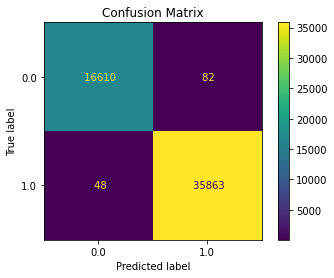

Sensitivity :  0.9950874670500839
Specificity :  0.9986633622009969
Accuracy :  0.9975286580613273


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)


In [ ]:
# 5 komşu sayısı için minkowski metriği 
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',weights='distance',p=3)
classifier.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(x_test_norm)

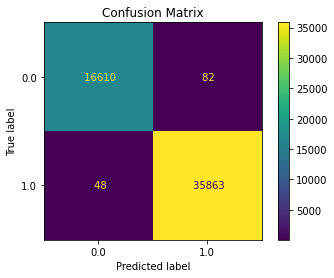

Sensitivity :  0.9950874670500839
Specificity :  0.9986633622009969
Accuracy :  0.9975286580613273


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

In [ ]:
# 5 komşu sayısı için minkowski euclidean 
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean',weights='distance',p=2)
classifier.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(x_test_norm)

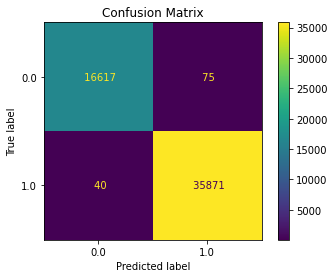

Sensitivity :  0.9955068296189792
Specificity :  0.9988861351674975
Accuracy :  0.9978138129004049


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

In [ ]:
# 5 komşu sayısı için manhattan metriği 
classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan',weights='distance',p=1)
classifier.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(x_test_norm)

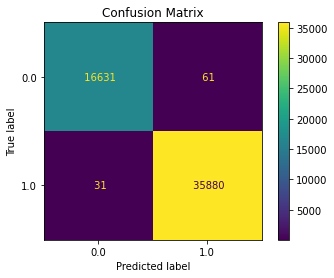

Sensitivity :  0.9963455547567697
Specificity :  0.9991367547548105
Accuracy :  0.9982510503203239


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

In [ ]:
# En yüksek doğruluk manhattan da olduğundan komşu sayılarını değiştirerek denedim 
classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan',weights='distance')
classifier.fit(x_train_norm, y_train)
y_pred = classifier.predict(x_test_norm)

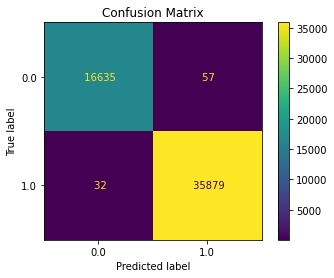

Sensitivity :  0.9965851905104242
Specificity :  0.9991089081339979
Accuracy :  0.9983080812881394


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7, metric='manhattan',weights='distance')
classifier.fit(x_train_norm, y_train)
y_pred = classifier.predict(x_test_norm)

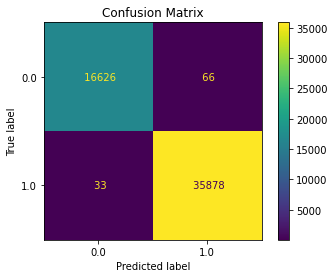

Sensitivity :  0.9960460100647016
Specificity :  0.9990810615131853
Accuracy :  0.9981179780620877


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

In [ ]:
# selectKBest ile veri setinden en iyi 20 öznitelik seçildi
select_feature = SelectKBest(chi2, k=20).fit(x_train_norm, y_train)
x_train_k = select_feature.transform(x_train_norm)
x_test_k = select_feature.transform(x_test_norm)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan',weights='distance')
classifier.fit(x_train_k, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(x_test_k)

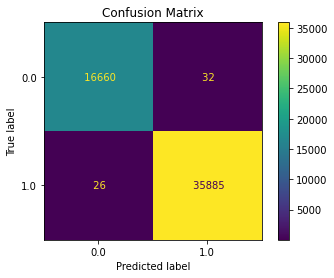

Sensitivity :  0.9980829139707644
Specificity :  0.9992759878588733
Accuracy :  0.9988974012888999


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_k, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='manhattan',weights='distance')
classifier.fit(x_train_k, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(x_test_k)
x_pred = classifier.predict(x_train_k)

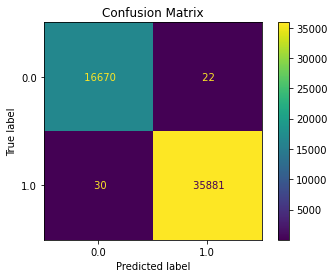

Sensitivity :  0.9986820033549005
Specificity :  0.999164601375623
Accuracy :  0.9990114632245309


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_k, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

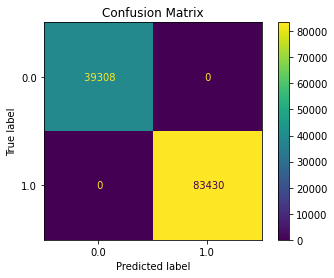

Sensitivity :  0.9986820033549005
Specificity :  0.999164601375623
Accuracy :  1.0


In [ ]:
# Eğitim doğruluk oranı
matrix = plot_confusion_matrix(classifier, x_train_k, y_train,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_train, x_pred)
print('Accuracy : ',acc)


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan',weights='distance')
classifier.fit(x_train_k, y_train)
y_pred = classifier.predict(x_train_k)

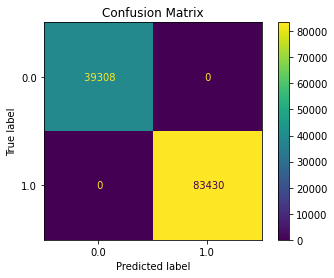

Sensitivity :  0.9986820033549005
Specificity :  0.999164601375623
Accuracy :  1.0


In [ ]:
matrix = plot_confusion_matrix(classifier, x_train_k, y_train,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_train, y_pred)
print('Accuracy : ',acc)


In [ ]:
# Rapor ve sunum için aşağıda ki default kodları baz aldım

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train_norm, y_train)
y_pred = classifier.predict(x_test_norm)

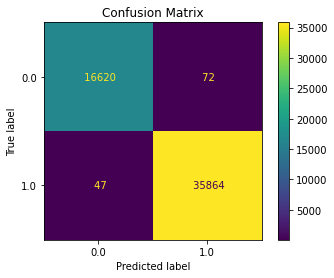

Sensitivity :  0.9986820033549005
Specificity :  0.999164601375623
Accuracy :  0.9977377716099842


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train_norm, y_train)
y_pred = classifier.predict(x_test_norm)

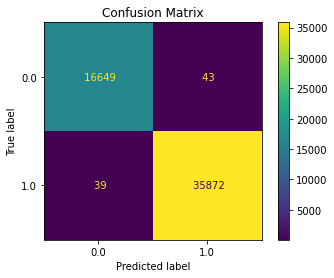

Sensitivity :  0.9986820033549005
Specificity :  0.999164601375623
Accuracy :  0.9984411535463756


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train_norm, y_train)
y_pred = classifier.predict(x_test_norm)

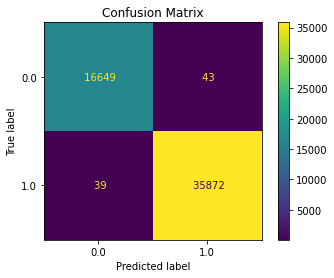

Sensitivity :  0.9986820033549005
Specificity :  0.999164601375623
Accuracy :  0.9984411535463756


In [ ]:
matrix = plot_confusion_matrix(classifier, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)
